<a href="https://colab.research.google.com/github/aalling93/10-semester/blob/master/malthe_speciale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re
import numpy as np
import math

Du kan åbne json som en table vha. pandas pakken.

In [0]:
df = pd.read_json('830_845_2.json', lines=True)
#df = pd.read_json('street_results_99_2.json', lines=True)

Først skal vi kigge på hvordan den loader tabellen for at vide hvordan vi kan arbejde med den

In [201]:
df.head()

,frame_number,timestamp,objects
0,39860,2020-04-28 05:21:24.129095078,[]
1,39861,2020-04-28 05:21:24.179130077,[]
2,39862,2020-04-28 05:21:24.229300976,[]
3,39863,2020-04-28 05:21:24.278990030,[]
4,39864,2020-04-28 05:21:24.329212904,[]


Så der er 3 celler. En med frame, en med time og et objekt. Så objektet er en hel celle. Først fjerner vi de frame hvor der IKKE er noget i objektet (altså. ingen målinger...)

In [202]:
df.head()
df = df[~df.objects.str.len().eq(0)]
df.head()

,frame_number,timestamp,objects
1885,41745,2020-04-28 05:22:58.307158947,"[{'id': 0, 'x': -2.196865558624267, 'y': -1.05..."
1886,41746,2020-04-28 05:22:58.371056080,"[{'id': 0, 'x': -2.365221738815307, 'y': -1.06..."
1887,41747,2020-04-28 05:22:58.420792103,"[{'id': 0, 'x': -2.462085723876953, 'y': -1.00..."
1888,41748,2020-04-28 05:22:58.457218885,"[{'id': 0, 'x': -2.382128715515136, 'y': -0.93..."
1889,41749,2020-04-28 05:22:58.520519972,"[{'id': 0, 'x': -2.334127902984619, 'y': -0.94..."


Timestamp('2020-04-28 05:22:58.307158947')

Nu er der kun frame hvor der er målinger. Lad os se objekterne

vi kan pille objektet fra hinanden:


In [203]:
print('\n',list(enumerate(df['objects']))[1])
print('\n',list(enumerate(df['objects']))[0][1])
print('\n',list(enumerate(df['objects']))[0][1][0])
print('\n',list(enumerate(df['objects']))[0][1][0].get('x'))


 (1, [{'id': 0, 'x': -2.365221738815307, 'y': -1.064175605773925, 'size': 142, 'bounding_box': []}])

 [{'id': 0, 'x': -2.196865558624267, 'y': -1.050206303596496, 'size': 89, 'bounding_box': []}]

 {'id': 0, 'x': -2.196865558624267, 'y': -1.050206303596496, 'size': 89, 'bounding_box': []}

 -2.196865558624267


Vi kan finde hvor mange timeframes der er

In [204]:
len((list(enumerate(df['objects']))))

448

I hver timeframe er der X antal objekter der laver noget. Det kan du finde.  Så i frame 3 er der 2 obj

In [205]:
(list(enumerate(df['objects']))[3])

(3,
 [{'bounding_box': [],
   'id': 0,
   'size': 259,
   'x': -2.382128715515136,
   'y': -0.9323241710662841}])

Og så for objekt 1 i 2. timeframe

In [206]:
print('timeframe er',(list(enumerate(df['objects']))[3][0]))
print('\n objetet er\n',(list(enumerate(df['objects']))[3][1]))

timeframe er 3

 objetet er
 [{'id': 0, 'x': -2.382128715515136, 'y': -0.9323241710662841, 'size': 259, 'bounding_box': []}]


Nu finder vi først ud af hvor mange id'er der der. Derefter finder vi koordianter for hvert id..

In [0]:
objs = []
for i in range(len(df)):
  for j in range(len((list(enumerate(df['objects']))[i][1]))):
    ID = (list(enumerate(df['objects']))[i][1][j].get('id'))
    if ID not in objs:
      objs.append(ID)


data_obj = []
for i in range(len(objs)):
  x = []
  y = []
  frame = []
  for j in range(len(df)):
    for k in range(len((list(enumerate(df['objects']))[j][1]))):
      ID = (list(enumerate(df['objects']))[j][1][k].get('id'))
    if ID==objs[i]:
      x.append(list(enumerate(df['objects']))[j][1][k].get('x'))
      y.append(list(enumerate(df['objects']))[j][1][k].get('y'))
      frame.append(list(enumerate(df['objects']))[j][0])
      
  data = [i,x,y,frame]
  data_obj.append(data)  

Ok.. Så har vi fundet x,y for hvert id

In [229]:
print('Antal objekter',len(data_obj[1]))

data_obj[4][0]

Antal objekter 4


4

Og hvor hvert objekt har du hvilket frame de er i samt deres xy koordinter..

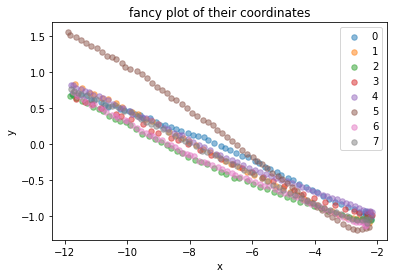

In [231]:
import matplotlib.pyplot as plt

#plot for each object.
for i in range(len(objs)):
  plt.scatter(data_obj[i][1], data_obj[i][2], s=30, alpha=0.5, label=objs[i])

plt.title('fancy plot of their coordinates')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

Nu kan vi så lave funktioner der gør det nemmere at bruge....


In [0]:
import os.path
def get_df(json):
  """
  """
  allowed_types = ['.json']
  assert (os.path.splitext(json)[1] in allowed_types),('\nERROR: '+os.path.splitext(json)[1]+': Illegal file type.')


  df = pd.read_json(json, lines=True)
  df = df[~df.objects.str.len().eq(0)]

  return df


def get_data(df):
  """

  """
  objs = []
  for i in range(len(df)):
    for j in range(len((list(enumerate(df['objects']))[i][1]))):
      ID = (list(enumerate(df['objects']))[i][1][j].get('id'))
      if ID not in objs:
        objs.append(ID)


  data_obj = []
  for i in range(len(objs)):
    x = []
    y = []
    frame = []
    time = []
    for j in range(len(df)):
      for k in range(len((list(enumerate(df['objects']))[j][1]))):
        ID = (list(enumerate(df['objects']))[j][1][k].get('id'))
      if ID==objs[i]:
        x.append(list(enumerate(df['objects']))[j][1][k].get('x'))
        y.append(list(enumerate(df['objects']))[j][1][k].get('y'))
        frame.append(list(enumerate(df['objects']))[j][0])
        time.append(df['timestamp'].iloc[j])

    data = [i,x,y,frame,time]
    data_obj.append(data)  

  return objs,data_obj


def plot_data(data_obj,objs):
  """
  """
  for i in range(len(objs)):
    plt.scatter(data_obj[i][1], data_obj[i][2], s=30, alpha=0.5, label=objs[i])

  plt.title('fancy plot of their coordinates')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc=1)
  plt.show()
  return None



import math
def get_distances(x,y,stride=0):
  """

  """
  assert len(x)==len(y),"you dumbass, the size of x and y should be the same."
  assert len(x)>0, 'this ID didnt move..'
  distance = []
  x = np.array(x)
  y = np.array(y)
  

  if stride ==0:
    step=1
  else:
    step=stride
  
  for i in range(len(x)):
    temp =[]
    for j in range(stride,len(x)-stride,step):
      d = math.sqrt((x[j+stride]-x[j])**2+(y[j+stride]-[j])**2);
      temp.append(d)
    distance.append(temp)

  return distance


import datetime as dt

def get_speed(data_obj,ID,stride=0):
  """
    v = distace/time
  """
  x = np.asarray(data_obj[ID][1])
  y = np.asarray(data_obj[ID][2])
  time = np.asarray(data_obj[ID][4])
  if stride ==0:
    step=1
  if stride>0:
    step=stride
  
  speed = []

  for j in range(0,len(x)-step,step):
    d = math.sqrt((x[j+step]-x[j])**2+(y[j+step]-y[j])**2);
    t = (time[j+step]-time[j]).total_seconds();
    if t>0:
      v = d/t;
    speed.append(v)
  return speed

Prøver nu at bruge funktionerne..

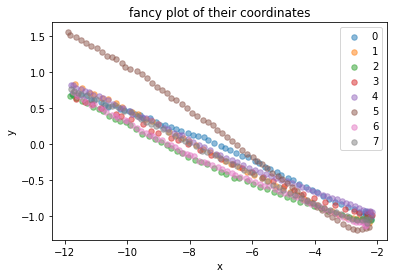

In [374]:
#'830_845_2.json'
#'street_results_99_2.json'
df = get_df('830_845_2.json')
objs,data_obj = get_data(df)
plot_data(data_obj,objs)
#finder distancerne for første objekte (dvs. objekt 0). 
dist = get_distances(data_obj[0][1],data_obj[0][2]);
#finder hastigheden..
speed = get_speed(data_obj,1,stride=0)

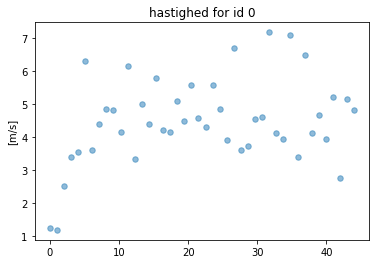

In [376]:
place = np.linspace(0, len(speed), num=len(speed))
plt.scatter(place,np.array(speed), s=30, alpha=0.5)
plt.title('fancy plot of their coordinates')
plt.xlabel('')
plt.ylabel('[m/s]')
plt.title('hastighed for id 0')
plt.show()